In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
from pathlib import Path 

%matplotlib inline

In [3]:
# Load CSV file
brewery_data_csv = Path("breweries_complete.csv")

In [4]:
# Read data file and store it in DataFrame
breweries_complete = pd.read_csv(brewery_data_csv, skipinitialspace=True)
breweries_complete.head()

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6


## Total breweries across all types per state

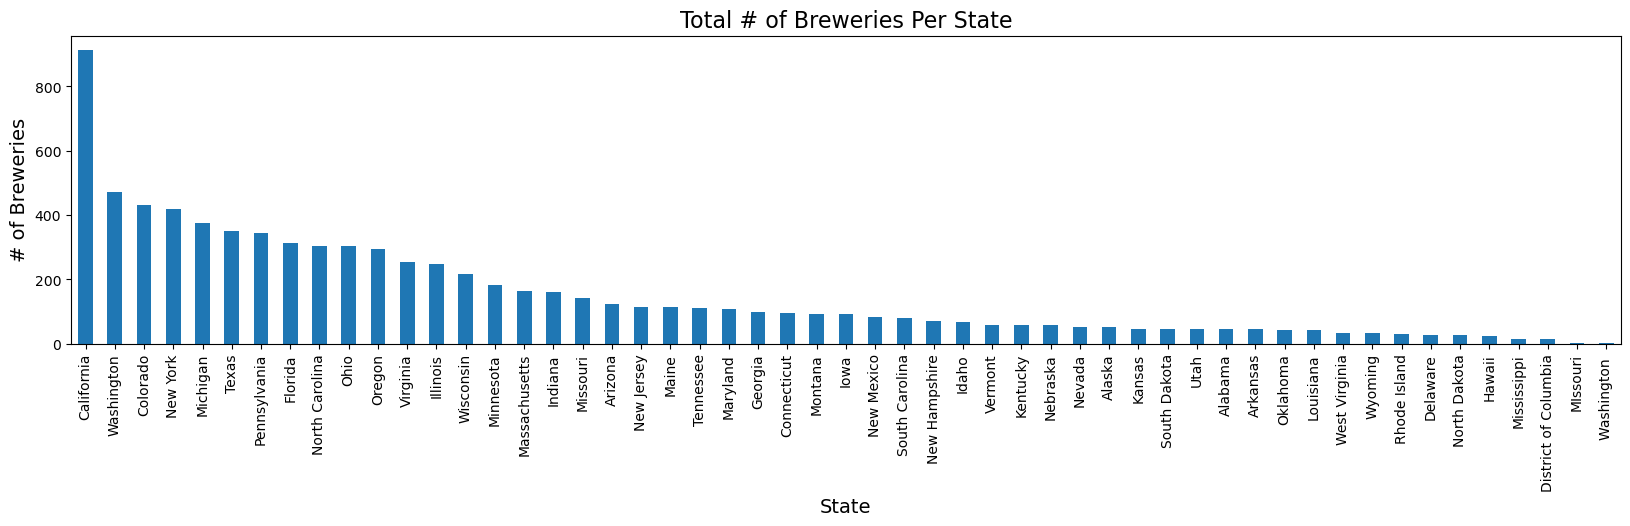

In [5]:
# Generate a bar plot showing total number of breweries by state 
brew_by_state = breweries_complete.groupby(["state"])["brewery_type"].count()
brew_by_state = brew_by_state.sort_values(ascending=False)
brew_by_state_df = pd.DataFrame(brew_by_state)

# Display bar plot, label x and y, apply formatting 
brew_chart = brew_by_state_df.plot(kind="bar", figsize=(20,4), legend=False)
brew_chart.set_title("Total # of Breweries Per State", fontsize=16)
brew_chart.set_xlabel("State", fontsize=14)
brew_chart.set_ylabel("# of Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total "open"-type breweries per state

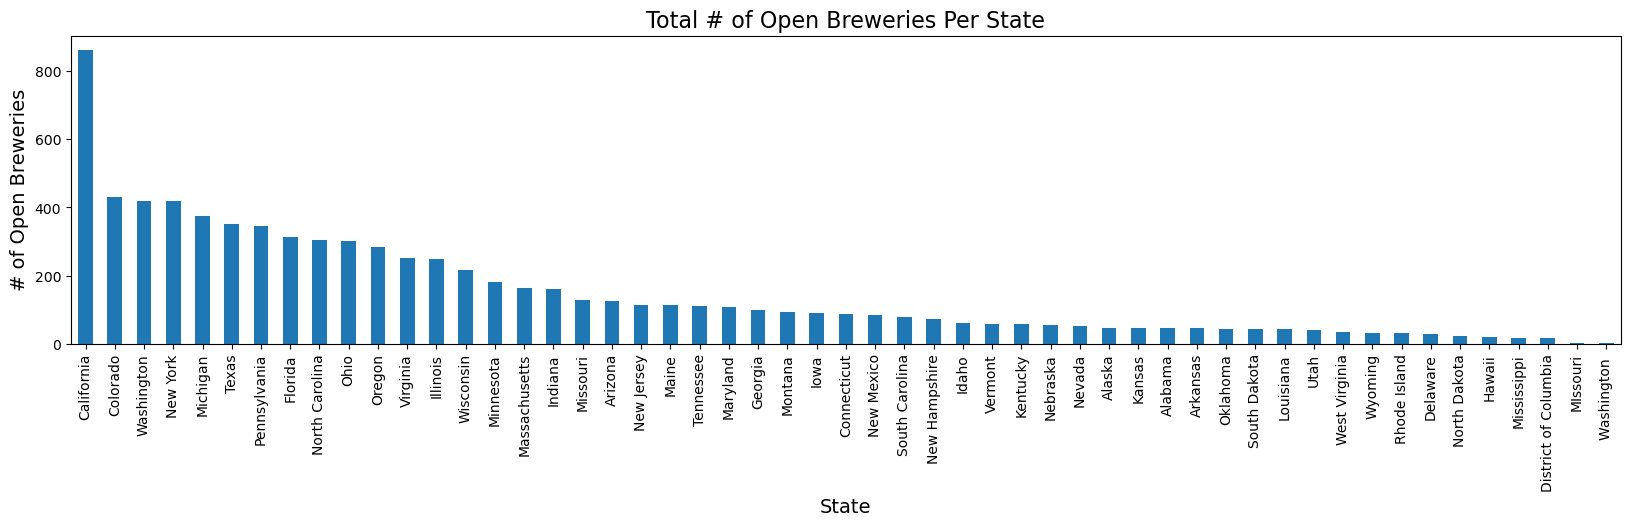

In [6]:
# Remove data of closed breweries 
open_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Generate a bar plot showing total number of open breweries by state 
open_brew_by_state = open_breweries.groupby(["state"])["brewery_type"].count()
open_brew_by_state = open_brew_by_state.sort_values(ascending=False)
open_breweries_df = pd.DataFrame(open_brew_by_state)

# Display bar plot, label x and y, apply formatting 
open_brew_chart = open_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
open_brew_chart.set_title("Total # of Open Breweries Per State", fontsize=16)
open_brew_chart.set_xlabel("State", fontsize=14)
open_brew_chart.set_ylabel("# of Open Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/open_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total closed breweries per state

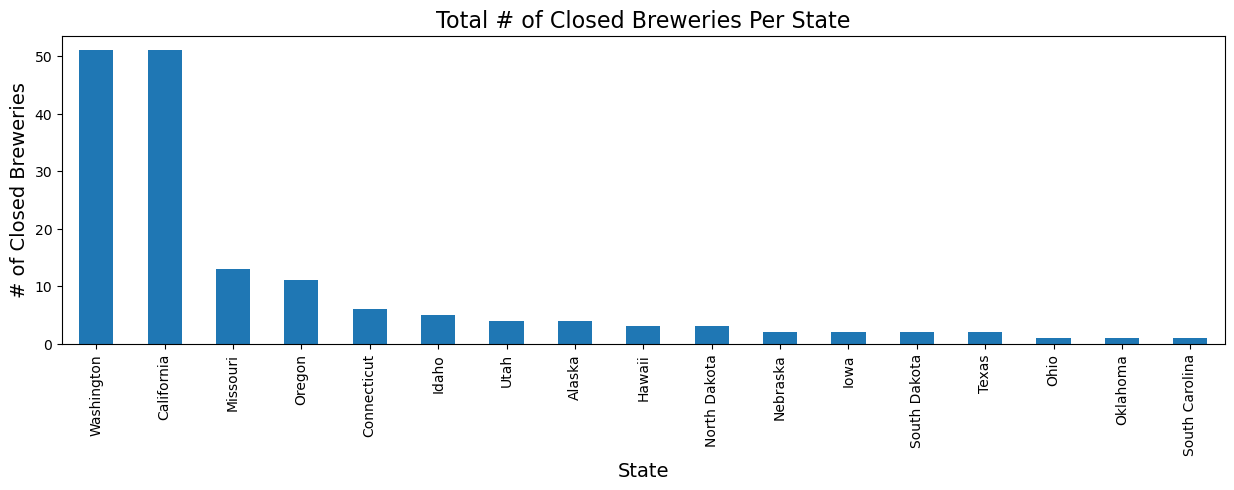

In [7]:
# Pull data for closed breweries 
closed_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "closed"]

# Generate a bar plot showing total number of closed breweries by state 
closed_brew_by_state = closed_breweries.groupby(["state"])["brewery_type"].count()
closed_brew_by_state = closed_brew_by_state.sort_values(ascending=False)
closed_breweries_df = pd.DataFrame(closed_brew_by_state)

# Display bar plot, label x and y, apply formatting 
closed_brew_chart = closed_breweries_df.plot(kind="bar", figsize=(15,4), legend=False)
closed_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
closed_brew_chart.set_xlabel("State", fontsize=14)
closed_brew_chart.set_ylabel("# of Closed Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/closed_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total planned breweries per state

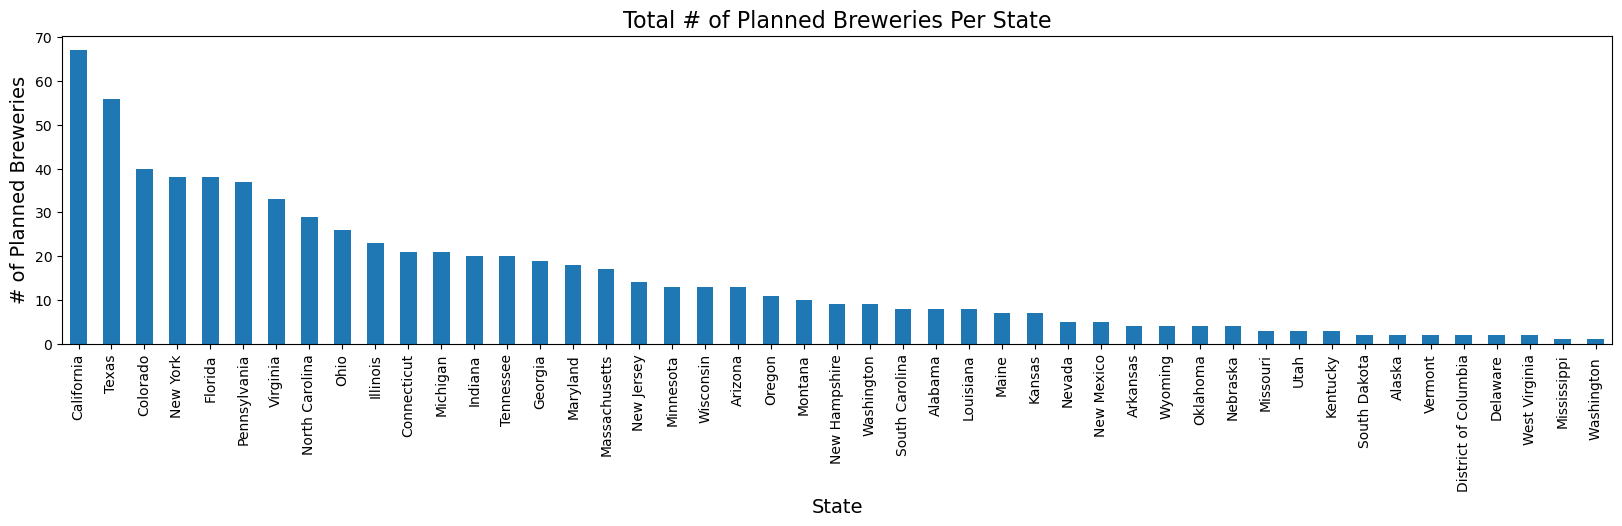

In [8]:
# Pull data for planned breweries
planned_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "planning"]

# Generate a bar plot showing total number of closed breweries by state 
planned_brew_by_state = planned_breweries.groupby(["state"])["brewery_type"].count()
planned_brew_by_state = planned_brew_by_state.sort_values(ascending=False)
planned_breweries_df = pd.DataFrame(planned_brew_by_state)

# Display bar plot, label x and y, apply formatting 
planned_brew_chart = planned_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
planned_brew_chart.set_title("Total # of Planned Breweries Per State", fontsize=16)
planned_brew_chart.set_xlabel("State", fontsize=14)
planned_brew_chart.set_ylabel("# of Planned Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/planned_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of brewery-types (no closed) per state

In [9]:
# Identify number of closed breweries in comparison to other types 
breweries_complete["brewery_type"].value_counts()

micro         4114
brewpub       2395
planning       702
regional       213
contract       196
closed         162
large           74
proprietor      69
nano             5
bar              2
Name: brewery_type, dtype: int64

In [10]:
# Drop closed breweries from dataset 
open_planned_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Output csv of only open or planned breweries  
open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)
open_planned_breweries

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


In [11]:
# Using code from team member Natalia Lopez 
open_planned_by_state = open_planned_breweries.groupby(["state", "brewery_type"])["brewery_type"].count()
open_planned_by_state

state    brewery_type
Alabama  brewpub          4
         contract         1
         micro           32
         planning         8
Alaska   brewpub         14
                         ..
Wyoming  brewpub         12
         contract         1
         micro           14
         planning         4
         regional         1
Name: brewery_type, Length: 283, dtype: int64

In [12]:
open_planned_by_state_index = open_planned_by_state.index
open_planned_by_state_index

MultiIndex([(  'Alabama',    'brewpub'),
            (  'Alabama',   'contract'),
            (  'Alabama',      'micro'),
            (  'Alabama',   'planning'),
            (   'Alaska',    'brewpub'),
            (   'Alaska',   'contract'),
            (   'Alaska',      'micro'),
            (   'Alaska',   'planning'),
            (   'Alaska',   'regional'),
            (  'Arizona',    'brewpub'),
            ...
            ('Wisconsin',      'micro'),
            ('Wisconsin',       'nano'),
            ('Wisconsin',   'planning'),
            ('Wisconsin', 'proprietor'),
            ('Wisconsin',   'regional'),
            (  'Wyoming',    'brewpub'),
            (  'Wyoming',   'contract'),
            (  'Wyoming',      'micro'),
            (  'Wyoming',   'planning'),
            (  'Wyoming',   'regional')],
           names=['state', 'brewery_type'], length=283)

In [13]:
open_planned_by_state_index2 = open_planned_by_state.unstack()
open_planned_by_state_index2

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
Alabama,NaN,4.0,1.0,NaN,32.0,NaN,8.0,NaN,NaN
Alaska,NaN,14.0,1.0,NaN,29.0,NaN,2.0,NaN,1.0
Arizona,NaN,46.0,4.0,2.0,58.0,NaN,13.0,NaN,1.0
Arkansas,NaN,18.0,1.0,NaN,22.0,NaN,4.0,NaN,NaN
California,NaN,249.0,27.0,15.0,461.0,NaN,67.0,13.0,29.0
Colorado,NaN,138.0,9.0,7.0,222.0,NaN,40.0,4.0,11.0
Connecticut,NaN,11.0,5.0,NaN,49.0,NaN,21.0,NaN,2.0
Delaware,NaN,14.0,NaN,1.0,10.0,NaN,2.0,NaN,1.0
District of Columbia,NaN,6.0,2.0,NaN,5.0,NaN,2.0,NaN,1.0


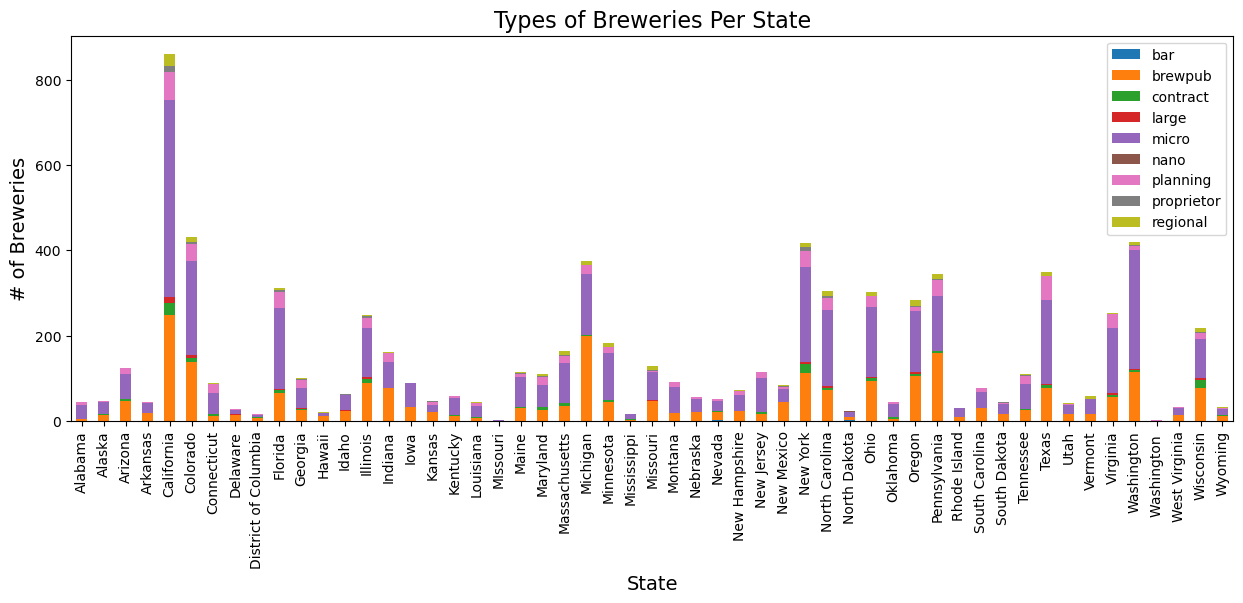

In [14]:
# Display bar plot, label x and y, apply formatting 
stacked_chart = open_planned_by_state_index2.plot(kind="bar", stacked=True, figsize=(15,5))
stacked_chart.set_title("Types of Breweries Per State", fontsize=16)
stacked_chart.set_xlabel("State", fontsize=14)
stacked_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_types_per_state.png", bbox_inches="tight")
plt.show()

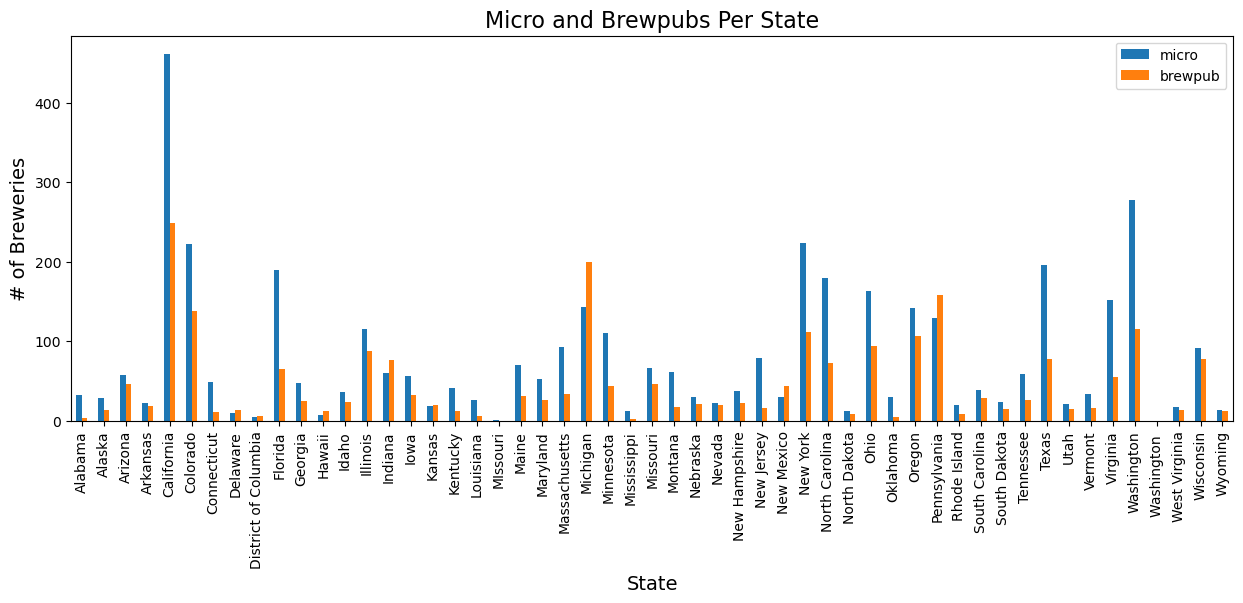

In [15]:
# new DataFrame with only micro and brewpub columns 
micro_brewpub = open_planned_by_state_index2[["micro", "brewpub"]]

# Display bar plot, label x and y, apply formatting 
micro_brewpub_chart = micro_brewpub.plot(kind="bar", figsize=(15,5))
micro_brewpub_chart.set_title("Micro and Brewpubs Per State", fontsize=16)
micro_brewpub_chart.set_xlabel("State", fontsize=14)
micro_brewpub_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/micro_brewpubs_per_state.png", bbox_inches="tight")
plt.show()

In [16]:
micro_brewpub = open_planned_by_state_index2[["micro", "brewpub"]]
micro_brewpub

brewery_type,micro,brewpub
state,,
Alabama,32.0,4.0
Alaska,29.0,14.0
Arizona,58.0,46.0
Arkansas,22.0,18.0
California,461.0,249.0
Colorado,222.0,138.0
Connecticut,49.0,11.0
Delaware,10.0,14.0
District of Columbia,5.0,6.0


In [17]:
# new DataFrame with only micro and brewpub columns 
micro_brewpub = open_planned_by_state_index2[["micro", "brewpub"]]
micro_brewpub_df = pd.DataFrame(micro_brewpub)
micro_brewpub_reset = micro_brewpub_df.reset_index()
micro_brewpub_reset

brewery_type,state,micro,brewpub
0,Alabama,32.0,4.0
1,Alaska,29.0,14.0
2,Arizona,58.0,46.0
3,Arkansas,22.0,18.0
4,California,461.0,249.0
5,Colorado,222.0,138.0
6,Connecticut,49.0,11.0
7,Delaware,10.0,14.0
8,District of Columbia,5.0,6.0
9,Florida,190.0,65.0


In [18]:
sum_column = micro_brewpub_reset["micro"] + micro_brewpub_reset["brewpub"]
micro_brewpub_reset["Total"] = sum_column
micro_brewpub_reset

brewery_type,state,micro,brewpub,Total
0,Alabama,32.0,4.0,36.0
1,Alaska,29.0,14.0,43.0
2,Arizona,58.0,46.0,104.0
3,Arkansas,22.0,18.0,40.0
4,California,461.0,249.0,710.0
5,Colorado,222.0,138.0,360.0
6,Connecticut,49.0,11.0,60.0
7,Delaware,10.0,14.0,24.0
8,District of Columbia,5.0,6.0,11.0
9,Florida,190.0,65.0,255.0


In [19]:
sum_column = micro_brewpub_reset["micro"] + micro_brewpub_reset["brewpub"]
micro_brewpub_reset["Total"] = sum_column
sorted_count = micro_brewpub_reset.sort_values(by=["Total"], ascending=False)
sorted_count

brewery_type,state,micro,brewpub,Total
4,California,461.0,249.0,710.0
48,Washington,278.0,115.0,393.0
5,Colorado,222.0,138.0,360.0
23,Michigan,143.0,199.0,342.0
33,New York,224.0,111.0,335.0
39,Pennsylvania,129.0,158.0,287.0
44,Texas,196.0,77.0,273.0
36,Ohio,163.0,94.0,257.0
9,Florida,190.0,65.0,255.0
34,North Carolina,179.0,72.0,251.0


In [20]:
top_states = open_planned_by_state_index2.loc[["California", "Washington", "Colorado", "Michigan", "New York"]]
top_states

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
California,NaN,249.0,27.0,15.0,461.0,NaN,67.0,13.0,29.0
Washington,NaN,115.0,4.0,3.0,278.0,2.0,9.0,2.0,7.0
Colorado,NaN,138.0,9.0,7.0,222.0,NaN,40.0,4.0,11.0
Michigan,NaN,199.0,3.0,NaN,143.0,NaN,21.0,NaN,9.0
New York,NaN,111.0,22.0,4.0,224.0,NaN,38.0,10.0,9.0


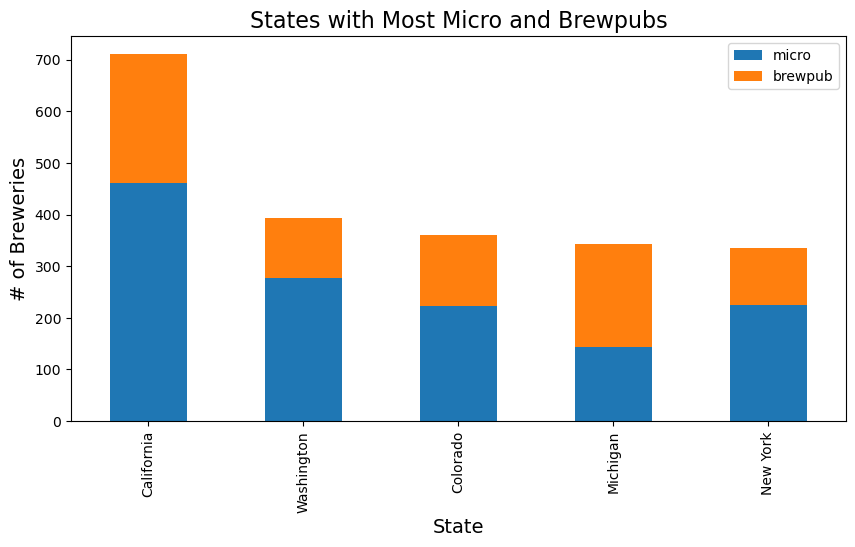

In [21]:
y = []
# Display bar plot, label x and y, apply formatting 
top_states_chart = top_states.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(10,5))
top_states_chart.set_title("States with Most Micro and Brewpubs", fontsize=16)
top_states_chart.set_xlabel("State", fontsize=14)
top_states_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/top_states_micro_brewpubs.png", bbox_inches="tight")
plt.show()

In [22]:
bottom_states = open_planned_by_state_index2.loc[["Wyoming", "Delaware", "North Dakota", "Hawaii", "Mississippi"]]
bottom_states

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
Wyoming,NaN,12.0,1.0,NaN,14.0,NaN,4.0,NaN,1.0
Delaware,NaN,14.0,NaN,1.0,10.0,NaN,2.0,NaN,1.0
North Dakota,1.0,8.0,NaN,NaN,12.0,2.0,NaN,NaN,NaN
Hawaii,NaN,12.0,NaN,NaN,7.0,NaN,NaN,NaN,1.0
Mississippi,NaN,2.0,1.0,NaN,12.0,NaN,1.0,NaN,NaN


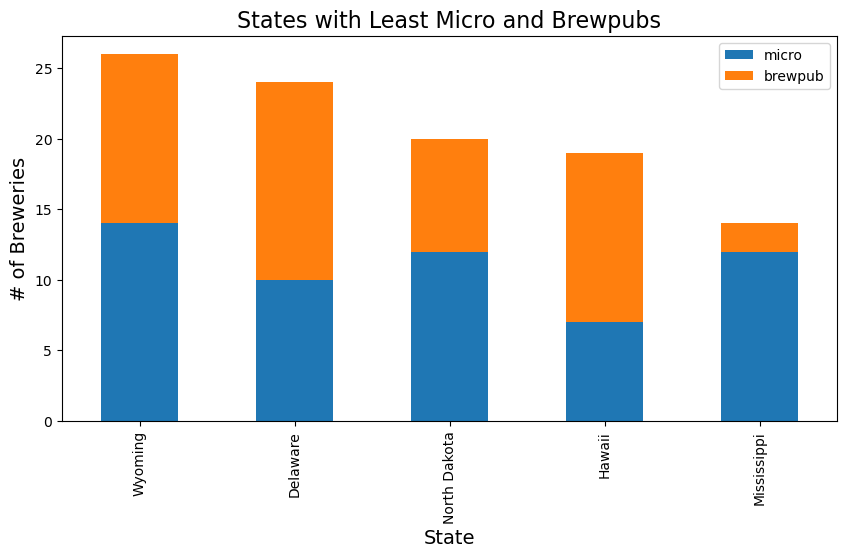

In [23]:
y = []
# Display bar plot, label x and y, apply formatting 
bottom_states_chart = bottom_states.plot(kind="bar", y=["micro", "brewpub"], stacked=True, figsize=(10,5))
bottom_states_chart.set_title("States with Least Micro and Brewpubs", fontsize=16)
bottom_states_chart.set_xlabel("State", fontsize=14)
bottom_states_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/tail_states_micro_brewpubs.png", bbox_inches="tight")
plt.show()

In [24]:
top_tail_states = breweries_complete.loc[(breweries_complete["state"] == "California") | (breweries_complete["state"] == "Mississippi")]
top_tail_states1 = top_tail_states[["brewery_type", "city", "state"]]
top_tail_states1_df = pd.DataFrame(top_tail_states1)
top_tail_states1_df

,brewery_type,city,state
1,large,San Diego,California
11,closed,Petaluma,California
23,micro,Westlake Village,California
31,micro,okolona,Mississippi
33,micro,Mariposa,California
...,...,...,...
6857,micro,Starkville,Mississippi
6888,micro,Greenville,Mississippi
7336,brewpub,San Diego,California
7428,contract,Los Angeles,California


In [25]:
micro_brewpub_city = top_tail_states1_df.loc[(top_tail_states1_df["brewery_type"] == "micro") | (top_tail_states1_df["brewery_type"] == "brewpub")]
micro_brewpub_city_df = pd.DataFrame(micro_brewpub_city)
micro_brewpub_city_df

,brewery_type,city,state
23,micro,Westlake Village,California
31,micro,okolona,Mississippi
33,micro,Mariposa,California
44,brewpub,Santa Rosa,California
51,brewpub,San Francisco,California
...,...,...,...
6117,brewpub,Ocean Springs,Mississippi
6162,brewpub,Hesperia,California
6857,micro,Starkville,Mississippi
6888,micro,Greenville,Mississippi


In [26]:
city_concentration = micro_brewpub_city_df.groupby(["state", "city", "brewery_type"])["brewery_type"].count()
city_concentration

state        city             brewery_type
California   Agoura Hills     brewpub         2
             Alameda          micro           3
             Alamo            micro           1
             Aliso Viejo      brewpub         1
             American Canyon  brewpub         1
                                             ..
Mississippi  Ocean Springs    micro           1
             Starkville       micro           1
             Vicksburg        brewpub         1
             Water Valley     micro           1
             okolona          micro           1
Name: brewery_type, Length: 359, dtype: int64

In [27]:
city_concentration_index = city_concentration.index
city_concentration_index

MultiIndex([( 'California',    'Agoura Hills', 'brewpub'),
            ( 'California',         'Alameda',   'micro'),
            ( 'California',           'Alamo',   'micro'),
            ( 'California',     'Aliso Viejo', 'brewpub'),
            ( 'California', 'American Canyon', 'brewpub'),
            ( 'California',         'Anaheim', 'brewpub'),
            ( 'California',         'Anaheim',   'micro'),
            ( 'California',    'Apple Valley', 'brewpub'),
            ( 'California',    'Apple Valley',   'micro'),
            ( 'California',         'Arcadia',   'micro'),
            ...
            ('Mississippi',         'Jackson',   'micro'),
            ('Mississippi',            'Kiln',   'micro'),
            ('Mississippi',          'Laurel',   'micro'),
            ('Mississippi',         'Natchez',   'micro'),
            ('Mississippi',   'Ocean Springs', 'brewpub'),
            ('Mississippi',   'Ocean Springs',   'micro'),
            ('Mississippi',      'Starkv

In [28]:
city_concentration_index2 = city_concentration.unstack()
city_concentration_index2_df = pd.DataFrame(city_concentration_index2)
city_concentration_reset = city_concentration_index2_df.reset_index()
city_concentration_reset


brewery_type,state,city,brewpub,micro
0,California,Agoura Hills,2.0,NaN
1,California,Alameda,NaN,3.0
2,California,Alamo,NaN,1.0
3,California,Aliso Viejo,1.0,NaN
4,California,American Canyon,1.0,NaN
...,...,...,...,...
277,Mississippi,Ocean Springs,1.0,1.0
278,Mississippi,Starkville,NaN,1.0
279,Mississippi,Vicksburg,1.0,NaN
280,Mississippi,Water Valley,NaN,1.0


In [29]:
sum_column2 = city_concentration_reset["micro"] + city_concentration_reset["brewpub"]
city_concentration_reset["Total"] = sum_column2
sorted_count2 = city_concentration_reset.sort_values(by=["Total"], ascending=False)
sorted_count2_df = pd.DataFrame(sorted_count2)
sorted_count2_df

brewery_type,state,city,brewpub,micro,Total
194,California,San Diego,22.0,45.0,67.0
196,California,San Francisco,17.0,15.0,32.0
119,California,Los Angeles,6.0,12.0,18.0
189,California,Sacramento,5.0,13.0,18.0
152,California,Oakland,4.0,10.0,14.0
...,...,...,...,...,...
276,Mississippi,Natchez,NaN,1.0,NaN
278,Mississippi,Starkville,NaN,1.0,NaN
279,Mississippi,Vicksburg,1.0,NaN,NaN
280,Mississippi,Water Valley,NaN,1.0,NaN


### Code Sources

Cohort member: Natalia Lopez 

https://www.tutorialspoint.com/python-pandas-how-to-skip-initial-space-from-a-dataframe

https://www.statology.org/pandas-keep-columns/

https://builtin.com/data-science/pandas-pivot-tables

https://www.geeksforgeeks.org/how-to-create-a-pivot-table-in-python-using-pandas/

https://medium.com/@enricobergamini/creating-non-numeric-pivot-tables-with-python-pandas-7aa9dfd788a7

https://pandas.pydata.org/docs/user_guide/reshaping.html

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://www.youtube.com/watch?v=tcRGa2soc-c

https://www.statology.org/pandas-pivot-table-sort/

https://www.tutorialspoint.com/how-to-put-a-legend-outside-the-plot-with-pandas

https://www.statology.org/pandas-filter-rows-containing-string/

https://www.youtube.com/watch?v=O4538i9MQEc

https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns

https://www.statology.org/pandas-groupby-two-columns/

https://www.adamsmith.haus/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

https://blog.hubspot.com/website/filter-rows-pandas

In [30]:
# Output csv of only micro and brewpubs sorted by quanity/state 
# sorted_count.to_csv("breweries_micro_brewpub_sorted.csv", index=False)

In [31]:
#micro_brewpub_reset_df1 = micro_brewpub_reset_df.groupby(["state"]).agg({"micro": "sum", "brewpub": "sum"})
#micro_brewpub_reset_df1

In [32]:
#micro_brewpub_reset_df1 = micro_brewpub_reset_df.groupby(["state"]).agg({"micro": "sum", "brewpub": "sum"})
#micro_brewpub_reset_df1

In [33]:
#micro_brewpub_reset.groupby(["micro", "brewpub"])["state"].size()
#micro_brewpub_reset_df = pd.DataFrame(micro_brewpub_reset)
#micro_brewpub_reset_df

In [34]:
#table_df = pd.read_csv("breweries_open_planned.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum") 
#pivot_table

In [35]:
# Output list of breweries with closed ones removed 
# open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)

In [36]:
# Load CSV file
# open_planned_brewery_data_csv = Path("breweries_open_planned.csv")

In [37]:
# Read data file and store it in DataFrame
# open_planned_brew_data = pd.read_csv(open_planned_brewery_data_csv)
# open_planned_brew_data

In [38]:
# Loop through rows of open_planned brewery data to confirm removal of 162 closed breweries 
#rowcount  = 0
# iterating through the whole file
#for row in open("breweries_open_planned.csv"):
  #rowcount+= 1
# printing the result
#print("Number of rows:", rowcount -1)

In [39]:
#open_planned_df = open_planned_brew_data[open_planned_brew_data.columns[~open_planned_brew_data.columns.isin(["name", "address_1", "city", "state_province", "postal_code", "longitude", "latitude", "zip_code", "brewery_id"])]]

# Output list of breweries with closed ones removed 
#open_planned_df.to_csv("breweries_open_planned_by_state.csv", index=False)
#open_planned_df

In [40]:
#live_brew_df = pd.DataFrame(open_planned_breweries)
#live_brew_reset = live_brew_df.reset_index()
#live_brew_reset

In [41]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum")
#margins=True, margins_name="Total"

#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["value"], fill_value=0, aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [42]:
# pivot_table.sort_values(by=["Total"], axis=1, ascending=False)


In [43]:
#bar_plot_data = pivot_table.groupby(["state"])["brewery_type"].count()
#bar_plot_data = pivot_table.sort_values(by=["values"], ascending=False)
#bar_plot_df = pd.DataFrame(bar_plot_data)

# Display bar plot, label x and y, apply formatting 
#stacked_bar_plot = pivot_table.plot(kind="bar", figsize=(20,7), stacked=True)
#stacked_bar_plot.set_xlabel("State", fontsize=18)
#stacked_bar_plot.set_ylabel("# of Planned Breweries", fontsize=18)

In [44]:
#pivot_table = pivot_table.sort_values(ascending=False)
# stacked_bar_plot = pivot_table.plot(kind="bar", stacked=True)
#plt.title("Types of Breweries Per State")
#plt.xlabel("States")
#plt.ylabel("Total # of Breweries by Type")


In [45]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv")
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["brewery_type"], aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [46]:
#table = pd.pivot_table(open_planned_df, values="brewery_type", index="", columns="brewery_types", aggfunc=np.sum)

In [47]:
#micro_brew = open_planned_brew_data.iloc["brewery_type" == "micro"]

In [48]:
#micro_brew = open_planned_brew_data.groupby(["brewery_type"])["state_province"].value_counts()